In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.font_manager as fm

font_path = "/home/aaron/.fonts/ARIAL.TTF"  # Adjust path if needed
prop = fm.FontProperties(fname=font_path)

plt.style.use('/home/aaron/thesis.mplstyle')

df_bb = pd.read_csv('./BB/metrics_all_folds-noIMAT.csv')
df_no = pd.read_csv('./noBB/metrics_all_folds-noIMAT.csv')

df_bb['BB'] = 'Yes'
df_no['BB'] = 'No'

df = pd.concat([df_bb, df_no])
df['label'] = df['label'].replace({'SC-Fat': 'SAT'})
df.sort_values(by='PatID', inplace=True)

df_sub = df[df['label'].isin(['Muscle', 'SAT'])]

df_sub = df_sub[df_sub['PatID'] != 1601]

df_sub


Bad key grid.zorder in file /home/aaron/thesis.mplstyle, line 9 ('grid.zorder: 0')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.9.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


,PatID,Fold,label,dice,msd,hd95,BB
55,231,2,SAT,0.895,1.038,2.634,Yes
54,231,2,Muscle,0.932,1.673,6.344,Yes
37,231,2,SAT,0.891,1.105,2.634,No
36,231,2,Muscle,0.940,1.481,4.165,No
90,294,3,Muscle,0.947,1.259,3.534,Yes
...,...,...,...,...,...,...,...
58,106958,2,SAT,0.943,0.823,2.356,Yes
25,312108,1,SAT,0.948,1.092,3.003,No
24,312108,1,Muscle,0.915,1.834,5.831,No
36,312108,1,Muscle,0.908,2.038,7.068,Yes


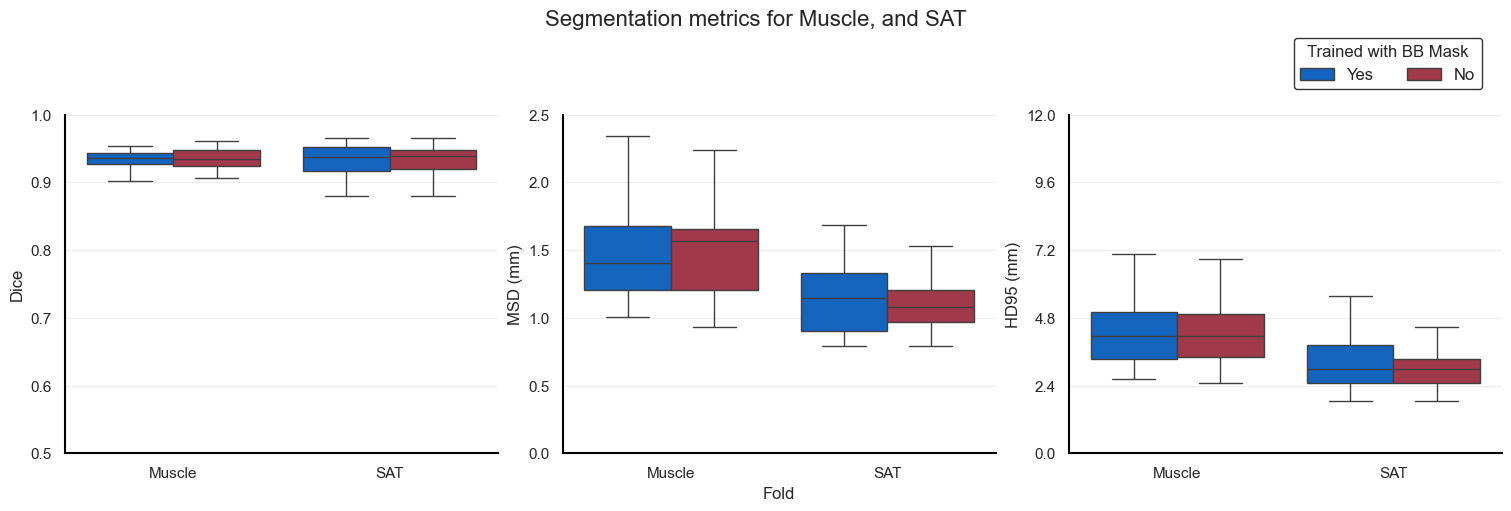

In [20]:
# boxplots of the metrics
cols_bb = {'Yes': '#0C63C6',
           'No': '#a63446'}

colors_bb = list(cols_bb.values())
custom_cmap = mcolors.ListedColormap(colors_bb)

sns.set(style='whitegrid')
fig, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
sns.boxplot(x='label', y='dice', hue='BB', data=df_sub, ax=ax[0], palette=cols_bb, showfliers=False, saturation=0.9, order=['Muscle', 'SAT'])
sns.boxplot(x='label', y='msd', hue='BB', data=df_sub, ax=ax[1], palette=cols_bb, showfliers=False, saturation=0.9, order=['Muscle', 'SAT'])
sns.boxplot(x='label', y='hd95', hue='BB', data=df_sub, ax=ax[2], palette=cols_bb, showfliers=False, saturation=0.9, order=['Muscle', 'SAT'])

plt.suptitle('Segmentation metrics for Muscle, and SAT', fontsize=16, horizontalalignment='center')
# make each plot have 5 y ticks
for i in range(3):
    yticks = np.linspace(0, ax[i].get_ylim()[1].round(0), 5)
    ax[i].set_yticks(yticks)
    ax[i].set_xlabel('')
    if i != 2:
        ax[i].legend().set_visible(False)
    else:
        ax[i].legend(title='Trained with BB Mask', loc='lower left', edgecolor='black', ncol=2, title_fontsize=12, fontsize=12, bbox_to_anchor=(0.5, 1.05))

    for axis in ['bottom', 'left']:
        ax[i].spines[axis].set_linewidth(1.5)
        ax[i].spines[axis].set_color('black')

    for axis in ['top', 'right']:
        ax[i].spines[axis].set_linewidth(0)
        ax[i].spines[axis].set_color('white')

    
ax[0].set_ylim(0.5, 1)
ax[0].set_yticks(np.linspace(0.5, 1, 6))
ax[0].set_ylabel('Dice')

ax[1].set_ylim(0, 2.5)
ax[1].set_yticks(np.linspace(0, 2.5, 6))
ax[1].set_ylabel('MSD (mm)')
ax[1].set_xlabel('Fold')

ax[2].set_ylim(0, 12)
ax[2].set_yticks(np.linspace(0, 12, 6))
ax[2].set_ylabel('HD95 (mm)')


plt.show()

/tmp/ipykernel_542280/2825851565.py:50: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


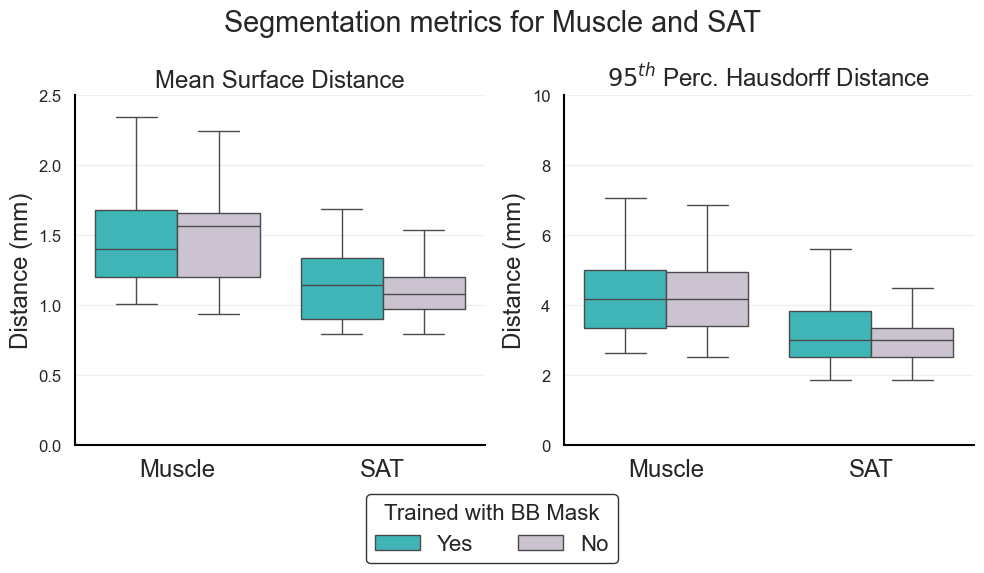

In [21]:
# boxplots of the metrics
cols_bb = {'Yes': '#25ced1',
           'No': '#cbc0d3'}

colors_bb = list(cols_bb.values())
custom_cmap = mcolors.ListedColormap(colors_bb)

sns.set(style='whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
sns.boxplot(x='label', y='msd', hue='BB', data=df_sub, ax=ax[0], palette=cols_bb, hue_order=['Yes', 'No'],
             showfliers=False, saturation=0.7, order=['Muscle', 'SAT'])
sns.boxplot(x='label', y='hd95', hue='BB', data=df_sub, ax=ax[1], palette=cols_bb, hue_order=['Yes', 'No'],
            showfliers=False, saturation=0.7, order=['Muscle', 'SAT'])

plt.suptitle('Segmentation metrics for Muscle and SAT', fontsize='xx-large', horizontalalignment='center')
# make each plot have 5 y ticks
for i in range(2):
    ax[i].set_xlabel('')
    #ax[i].set_xticks(df_sub['label'].unique(), fontsize=14)
    ax[i].legend().set_visible(False)

    for axis in ['bottom', 'left']:
        ax[i].spines[axis].set_linewidth(1.5)
        ax[i].spines[axis].set_color('black')

    for axis in ['top', 'right']:
        ax[i].spines[axis].set_linewidth(0)
        ax[i].spines[axis].set_color('white')

ax[0].set_title('Mean Surface Distance', fontsize='x-large')
ax[0].set_ylim(0, 2)
ax[0].set_yticks(np.linspace(0, 2.5, 6))
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize='x-large')
ax[0].set_ylabel('Distance (mm)', fontsize='x-large')

ax[1].set_title(r'$95^{th}$ Perc. Hausdorff Distance', fontsize='x-large')
ax[1].set_yticks(np.linspace(0, 10, 6))
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize='x-large')
ax[1].set_ylabel('Distance (mm)', fontsize='x-large')


# Add a single legend for the entire figure
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Trained with BB Mask', loc='lower center', 
            edgecolor='black', ncol=2, title_fontsize=16, fontsize=16, 
            bbox_to_anchor=(0.5, -0.15), frameon=True)

plt.tight_layout()

plt.show()


In [22]:
df_bb['label'].replace({'SAT': 'SAT'}, inplace=True)
df_no['label'].replace({'SAT': 'SAT'}, inplace=True)

/tmp/ipykernel_542280/3835314328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bb['label'].replace({'SAT': 'SAT'}, inplace=True)
/tmp/ipykernel_542280/3835314328.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

/tmp/ipykernel_542280/3944608175.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot([0, 4], [0, 4], 'k--', lw=2.5, color='black', alpha=1, zorder=0)
/tmp/ipykernel_542280/3944608175.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot([0, 12], [0, 12], 'k--', lw=2.5, color='black', alpha=1, zorder=0)


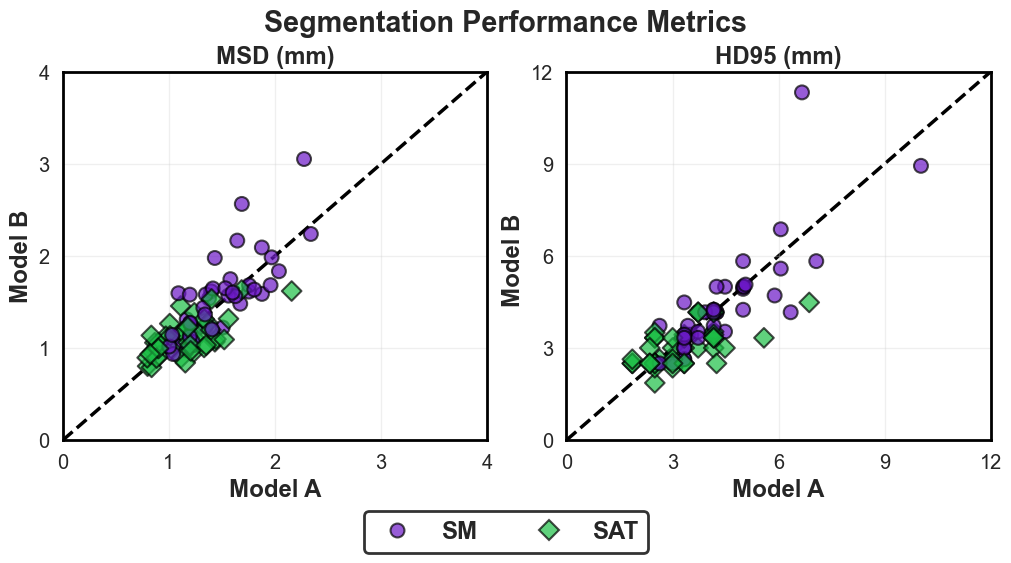

In [35]:
# identity plot for the metrics
# x-axis: BB, y-axis: No BB

palette_rois = {'Muscle': '#6B17C6',
                'SAT': '#1DBF46'}

shape_rois = {'Muscle': 'o',
                'SAT': 'D'}

df_identity_msd = df_sub[['PatID', 'label', 'msd', 'BB']].pivot(index=['PatID', 'label'], columns='BB', values='msd')
df_identity_hd95 = df_sub[['PatID', 'label', 'hd95', 'BB']].pivot(index=['PatID', 'label'], columns='BB', values='hd95')


fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# MSD
sns.scatterplot(x='Yes', y='No', data=df_identity_msd, ax=ax[0], style='label', markers=shape_rois, legend=False,
                 hue='label', palette=palette_rois, s=100, edgecolor='black', linewidth=1.5, alpha=0.7)
ax[0].plot([0, 4], [0, 4], 'k--', lw=2.5, color='black', alpha=1, zorder=0)
ax[0].set_xlim(0, 4)
ax[0].set_ylim(0, 4)
ax[0].set_xlabel('Model A', fontsize='x-large', weight='bold')
ax[0].set_ylabel('Model B', fontsize='x-large', weight='bold')
ax[0].set_title('MSD (mm)', fontsize='x-large', weight='bold')
ax[0].set_xticks(np.linspace(0, 4, 5))
ax[0].set_yticks(np.linspace(0, 4, 5))
ax[0].tick_params(axis='both', labelsize='large')



# HD95
sns.scatterplot(x='Yes', y='No', data=df_identity_hd95, ax=ax[1], style='label', markers=shape_rois,
                    hue='label', palette=palette_rois, s=100, edgecolor='black', linewidth=1.5, alpha=0.7)
ax[1].plot([0, 12], [0, 12], 'k--', lw=2.5, color='black', alpha=1, zorder=0)
ax[1].set_xlim(0, 12)
ax[1].set_ylim(0, 12)
ax[1].set_xlabel('Model A', fontsize='x-large', weight='bold')
ax[1].set_ylabel('Model B ', fontsize='x-large', weight='bold')
ax[1].set_title('HD95 (mm)', fontsize='x-large', weight='bold')
ax[1].set_xticks(np.linspace(0, 12, 5))
ax[1].set_yticks(np.linspace(0, 12, 5))
ax[1].tick_params(axis='both', labelsize='large')

ax[1].legend_.remove()
# Add a single legend for the entire figure
handles, labels = ax[1].get_legend_handles_labels()
labels = [label.replace('Muscle', 'SM') for label in labels]
legend = fig.legend(handles, labels, loc='lower center', 
            edgecolor='black', ncol=2, title_fontsize=16, fontsize='x-large', 
            bbox_to_anchor=(0.5, -0.12), frameon=True, 
            prop={'weight': 'bold', 'size': 'x-large'})

legend.get_frame().set_linewidth(2)

for i in range(2):
    for axis in ['bottom', 'left', 'top', 'right']:
        ax[i].spines[axis].set_linewidth(2)
        ax[i].spines[axis].set_color('black')

#     for axis in ['top', 'right']:
#         ax[i].spines[axis].set_linewidth(0)
#         ax[i].spines[axis].set_color('white')


plt.suptitle('Segmentation Performance Metrics', fontsize='xx-large', horizontalalignment='center', weight='bold')
plt.savefig('./identity_plot.pdf', bbox_inches='tight', dpi=500)
plt.show()


In [24]:
df_bb

,PatID,Fold,label,dice,msd,hd95,BB
0,448,0,Muscle,0.940,1.119,3.332,Yes
1,448,0,SC-Fat,0.937,0.890,1.863,Yes
2,448,0,BB,1.000,0.000,0.000,Yes
3,3684,0,Muscle,0.935,1.806,4.998,Yes
4,3684,0,SC-Fat,0.936,1.562,4.165,Yes
...,...,...,...,...,...,...,...
130,894,4,SC-Fat,0.927,1.127,3.003,Yes
131,894,4,BB,1.000,0.000,0.000,Yes
132,2602,4,Muscle,0.942,1.877,3.923,Yes
133,2602,4,SC-Fat,0.901,1.396,4.165,Yes


In [25]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from glob import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# turn pandas warnings off
pd.options.mode.chained_assignment = None  # default='warn'
# turn off warning for seaborn
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")


font_path = "/home/aaron/.fonts/ARIAL.TTF"  # Adjust path if needed
prop = fm.FontProperties(fname=font_path)

plt.style.use('/home/aaron/BodyComp/BodyCompMRL/MOMENTUM/registration/bodycomp_style.mplstyle')

fig, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)


palette_rois = {
    'Muscle': '#7C28F8',  # Using same color for both muscle types
    'SAT': '#23823B'  
}

df_bb['label'] = df_bb['label'].replace({'Muscle': 'Muscle', 'SAT': 'SAT'})
df_bb_plot = df_bb[
    (df_bb['label'].isin(['Muscle', 'SAT'])) 
]
# set facecolr to black
fig.patch.set_facecolor('black')
for i in range(3):
    ax[i].set_facecolor('black')
    ax[i].spines['top'].set_color('white')
    ax[i].spines['right'].set_color('white')
    ax[i].spines['left'].set_color('white')
    ax[i].spines['bottom'].set_color('white')
    ax[i].tick_params(axis='x', colors='white')
    ax[i].tick_params(axis='y', colors='white')

sns.boxplot(x='label', y='dice', hue='label', data=df_bb_plot, ax=ax[0], palette=palette_rois, 
            showfliers=False, saturation=0.9, order=['Muscle', 'SAT'],
            boxprops=dict(edgecolor='white'),
            medianprops=dict(color='white'),
            whiskerprops=dict(color='white'),
            capprops=dict(color='white'),
            linewidth=1.5)
ax[0].set_ylim(0.8, 1)
ax[0].set_yticks(np.linspace(0.8, 1, 6))
ax[0].set_xticks(['Muscle', 'SAT'])
ax[0].set_xticklabels(['Muscle', 'SAT'], fontsize=20, color='white', weight='bold')
ax[0].set_ylabel('DSC', fontsize=20, color='white', weight='bold')
ax[0].set_xlabel('', fontsize=20, color='white')
ax[0].set_title('DSC', fontsize=20, color='white', weight='bold')
sns.boxplot(x='label', y='msd', hue='label', data=df_bb_plot, ax=ax[1], palette=palette_rois,
            showfliers=False, saturation=0.9, order=['Muscle', 'SAT'],
            boxprops=dict(edgecolor='white'),
            medianprops=dict(color='white'),
            whiskerprops=dict(color='white'),
            capprops=dict(color='white'),
            linewidth=1.5)
sns.boxplot(x='label', y='hd95', hue='label', data=df_bb_plot, ax=ax[2], palette=palette_rois,
            showfliers=False, saturation=0.9, order=['Muscle', 'SAT'],
            boxprops=dict(edgecolor='white'),
            medianprops=dict(color='white'),
            whiskerprops=dict(color='white'),
            capprops=dict(color='white'),
            linewidth=1.5)
ax[1].set_ylim(0, 2.5)
ax[1].set_yticks(np.linspace(0, 2.5, 6))
ax[1].set_xticks(['Muscle', 'SAT'])
ax[1].set_xticklabels(['Muscle', 'SAT'], fontsize=20, color='white', weight='bold')
ax[1].set_ylabel('MSD (mm)', fontsize=20, color='white', weight='bold')
ax[1].set_xlabel('', fontsize=20, color='white')
ax[1].set_title('MSD', fontsize=20, color='white', weight='bold')

ax[2].set_ylim(0, 10)
ax[2].set_yticks(np.linspace(0, 10, 6))
ax[2].set_xticks(['Muscle', 'SAT'])
ax[2].set_xticklabels(['Muscle', 'SAT'], fontsize=20, color='white', weight='bold')
ax[2].set_ylabel('HD95 (mm)', fontsize=20, color='white', weight='bold')
ax[2].set_xlabel('', fontsize=20, color='white')
ax[2].set_title('HD95', fontsize=20, color='white', weight='bold')

#plt.suptitle('Segmentation metrics for Muscle and SAT', fontsize=30, horizontalalignment='center', color='white', weight='bold')


OSError: '/home/aaron/BodyComp/BodyCompMRL/MOMENTUM/registration/bodycomp_style.mplstyle' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
# identity plot for the metrics
# x-axis: BB, y-axis: No BB

palette_rois = {'Muscle': '#6B17C6',
                'SAT': '#ffe900'}

shape_rois = {'Muscle': 'o',
                'SAT': 'D'}

df_identity_msd = df_sub[['PatID', 'label', 'msd', 'BB']].pivot(index=['PatID', 'label'], columns='BB', values='msd')
df_identity_hd95 = df_sub[['PatID', 'label', 'hd95', 'BB']].pivot(index=['PatID', 'label'], columns='BB', values='hd95')

print(f"Number of data points: {len(df_identity_msd)}")

fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# MSD
sns.scatterplot(x='Yes', y='No', data=df_identity_msd, ax=ax[0], style='label', markers=shape_rois, legend=False,
                 hue='label', palette=palette_rois, s=100, edgecolor='black', linewidth=1.5, alpha=0.8, 
                 facecolor='black')
ax[0].plot([0, 4], [0, 4], 'k-', lw=2.5, color='black', alpha=0.5, zorder=0)
ax[0].set_xlim(0, 4)
ax[0].set_ylim(0, 4)
ax[0].set_xlabel('MSD - BB (mm)', fontsize='x-large')
ax[0].set_ylabel('MSD - No BB (mm)', fontsize='x-large')
ax[0].set_title('Mean Surface Distance', fontsize='x-large')
ax[0].set_xticks(np.linspace(0, 4, 5))
ax[0].set_yticks(np.linspace(0, 4, 5))

# HD95
sns.scatterplot(x='Yes', y='No', data=df_identity_hd95, ax=ax[1], style='label', markers=shape_rois,
                hue='label', palette=palette_rois, s=100, edgecolor='black', linewidth=1.5, alpha=0.8,
                facecolor='black')
ax[1].plot([0, 12], [0, 12], 'k-', lw=2.5, color='black', alpha=0.5, zorder=0)
ax[1].set_xlim(0, 12)
ax[1].set_ylim(0, 12)
ax[1].set_xlabel('HD95 - BB (mm)', fontsize='x-large')
ax[1].set_ylabel('HD95 - No BB (mm)', fontsize='x-large')
ax[1].set_title(r'$95^{th}$ Perc. Hausdorff Distance', fontsize='x-large')
ax[1].set_xticks(np.linspace(0, 12, 5))
ax[1].set_yticks(np.linspace(0, 12, 5))
ax[1].legend_.remove()

# Add a single legend for the entire figure
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', 
           edgecolor='black', ncol=2, title_fontsize=16, fontsize='x-large', 
           bbox_to_anchor=(0.5, -0.12), frameon=True)

for i in range(2):
    for axis in ['bottom', 'left']:
        ax[i].spines[axis].set_linewidth(1.5)
        ax[i].spines[axis].set_color('black')

    for axis in ['top', 'right']:
        ax[i].spines[axis].set_linewidth(0)
        ax[i].spines[axis].set_color('white')

plt.suptitle('Segmentation metrics for Muscle and SAT', fontsize='xx-large', horizontalalignment='center')


In [ ]:
palette_rois = {'Muscle': '#6B17C6',
                'SAT': '#ffe900'}
                #'IMAT': '#43AA8B'}

colors = list(palette_rois.values())
custom_cmap = mcolors.ListedColormap(colors)

df_bb = df_bb[df_bb['label'].isin(['Muscle', 'SAT'])]
metrics = ['msd', 'hd95']  # Removed 'dice'

# for each fold plot the metrics
fig, ax = plt.subplots(2, 1, figsize=(10, 10), constrained_layout=True)

for i, metric in enumerate(metrics):
    sns.boxplot(x='Fold', y=metric, data=df_bb, ax=ax[i], hue='label', palette=palette_rois, showfliers=False)
    ax[i].set_xlabel('')
    ax[i].set_xticklabels([f'{i+1}' for i in range(5)])

    ax[i].legend().set_visible(False)
        
        #ax[i].legend(edgecolor='black', ncol=3, fontsize=12, bbox_to_anchor=(1.05, 1))

    for axis in ['bottom', 'left']:
        ax[i].spines[axis].set_linewidth(1.5)
        ax[i].spines[axis].set_color('black')

    for axis in ['top', 'right']:
        ax[i].spines[axis].set_linewidth(0)
        ax[i].spines[axis].set_color('white')


ax[0].set_title('Mean Surface Distance', fontsize='x-large')
ax[0].set_ylim(0, 2)
ax[0].set_yticks(np.linspace(0, 2.5, 6))
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize='x-large')
ax[0].set_ylabel('Distance (mm)', fontsize='x-large')

ax[1].set_title(r'$95^{th}$ Perc. Hausdorff Distance', fontsize='x-large')
ax[1].set_yticks(np.linspace(0, 10, 6))
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize='x-large')
ax[1].set_ylabel('Distance (mm)', fontsize='x-large')
plt.suptitle('Segmentation metrics across training folds', fontsize=20, horizontalalignment='center')

# Add a single legend for the entire figure
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', 
            edgecolor='black', ncol=3, title_fontsize=16, fontsize=16, 
            bbox_to_anchor=(0.53, -0.06), frameon=True)

plt.show()


In [ ]:
palette_rois = {'Muscle': '#6B17C6',
                'SAT': '#ffe900'}
                

colors = list(palette_rois.values())
custom_cmap = mcolors.ListedColormap(colors)

df_bb = df_bb[df_bb['label'].isin(['Muscle', 'SAT'])]
metrics = ['msd', 'hd95']  # Removed 'dice'

# for each fold plot the metrics
fig, ax = plt.subplots(2, 1, figsize=(10, 10), constrained_layout=True)

for i, metric in enumerate(metrics):
    sns.boxplot(x='Fold', y=metric, data=df_no, ax=ax[i], hue='label', palette=palette_rois,
                showfliers=False)
    ax[i].set_xlabel('')
    ax[i].set_xticklabels([f'{i+1}' for i in range(5)])

    ax[i].legend().set_visible(False)
        
        #ax[i].legend(edgecolor='black', ncol=3, fontsize=12, bbox_to_anchor=(1.05, 1))

    for axis in ['bottom', 'left']:
        ax[i].spines[axis].set_linewidth(1.5)
        ax[i].spines[axis].set_color('black')

    for axis in ['top', 'right']:
        ax[i].spines[axis].set_linewidth(0)
        ax[i].spines[axis].set_color('white')

ax[0].set_title('Mean Surface Distance', fontsize='x-large')
ax[0].set_ylim(0, 2)
ax[0].set_yticks(np.linspace(0, 2.5, 6))
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize='x-large')
ax[0].set_ylabel('Distance (mm)', fontsize='x-large')

ax[1].set_title(r'$95^{th}$ Perc. Hausdorff Distance', fontsize='x-large')
ax[1].set_yticks(np.linspace(0, 10, 6))
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize='x-large')
ax[1].set_ylabel('Distance (mm)', fontsize='x-large')
plt.suptitle('Segmentation metrics across training folds', fontsize=20, horizontalalignment='center')
# Add a single legend for the entire figure
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', 
            edgecolor='black', ncol=3, title_fontsize=16, fontsize=16, 
            bbox_to_anchor=(0.53, -0.06), frameon=True)

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import sem, t

# Function to calculate 95% CI
def ci_95(x):
    n = len(x)
    mean = np.mean(x)
    std_err = sem(x)  # Standard error of the mean
    h = std_err * t.ppf((1 + 0.95) / 2, n - 1)  # Margin of error
    return (mean - h, mean + h)

In [ ]:
# group by fold and get the mean and std of the metrics

df_bb_grouped = df_bb.groupby(['label', 'Fold']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_bb_grouped.columns = ['_'.join(col) for col in df_bb_grouped.columns]

# round the values
df_bb_grouped = df_bb_grouped.round(3)

# Split the ci_95 column into two separate columns for each metric
df_bb_grouped[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_bb_grouped['msd_ci_95'].tolist(), index=df_bb_grouped.index)
df_bb_grouped[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_bb_grouped['hd95_ci_95'].tolist(), index=df_bb_grouped.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_bb_grouped = df_bb_grouped.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_bb_grouped = df_bb_grouped.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_bb_grouped['msd_ci_95'] = list(zip(df_bb_grouped['msd_ci_95_lower'], df_bb_grouped['msd_ci_95_upper']))
df_bb_grouped['hd95_ci_95'] = list(zip(df_bb_grouped['hd95_ci_95_lower'], df_bb_grouped['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_bb_grouped = df_bb_grouped.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])
# reorder 
df_bb_grouped = df_bb_grouped[['msd_mean', 'msd_std', 'msd_ci_95', 'hd95_mean', 'hd95_std', 'hd95_ci_95']]


# Swap the index levels
df_bb_grouped = df_bb_grouped.swaplevel().sort_index()


df_bb_grouped.to_csv('bb_metrics-fold_ROI.csv')


df_bb_grouped

In [ ]:
# get the avg of the metrics across all folds 
df_bb_avg = df_bb.groupby(['label']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_bb_avg.columns = ['_'.join(col) for col in df_bb_avg.columns]

# round the values
# Split the ci_95 column into two separate columns for each metric
df_bb_avg[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_bb_avg['msd_ci_95'].tolist(), index=df_bb_avg.index)

df_bb_avg[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_bb_avg['hd95_ci_95'].tolist(), index=df_bb_avg.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_bb_avg = df_bb_avg.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_bb_avg = df_bb_avg.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_bb_avg['msd_ci_95'] = list(zip(df_bb_avg['msd_ci_95_lower'], df_bb_avg['msd_ci_95_upper']))
df_bb_avg['hd95_ci_95'] = list(zip(df_bb_avg['hd95_ci_95_lower'], df_bb_avg['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_bb_avg = df_bb_avg.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])


# reorder
df_bb_avg['msd_err'] = (df_bb_avg['msd_std'] / np.sqrt(45)).round(2)
df_bb_avg['hd95_err'] = (df_bb_avg['hd95_std'] / np.sqrt(45)).round(2)



df_bb_avg = df_bb_avg[['msd_mean', 'msd_err', 'msd_ci_95', 'hd95_mean', 'hd95_err', 'hd95_ci_95']]

df_bb_avg.to_csv('bb_metrics-avg_ROI.csv')

df_bb_avg


In [ ]:
# group by fold and get the mean and std of the metrics

df_no_grouped = df_no.groupby(['label', 'Fold']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_no_grouped.columns = ['_'.join(col) for col in df_no_grouped.columns]

# round the values
df_no_grouped = df_no_grouped.round(3)

# Split the ci_95 column into two separate columns for each metric
df_no_grouped[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_no_grouped['msd_ci_95'].tolist(), index=df_no_grouped.index)
df_no_grouped[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_no_grouped['hd95_ci_95'].tolist(), index=df_no_grouped.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_no_grouped = df_no_grouped.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_no_grouped = df_no_grouped.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_no_grouped['msd_ci_95'] = list(zip(df_no_grouped['msd_ci_95_lower'], df_no_grouped['msd_ci_95_upper']))
df_no_grouped['hd95_ci_95'] = list(zip(df_no_grouped['hd95_ci_95_lower'], df_no_grouped['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_no_grouped = df_no_grouped.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])
# reorder 


df_no_grouped = df_no_grouped[['msd_mean', 'msd_std', 'msd_ci_95', 'hd95_mean', 'hd95_std', 'hd95_ci_95']]


# Swap the index levels
df_no_grouped = df_no_grouped.swaplevel().sort_index()

df_no_grouped.to_csv('noBB_metrics-fold_ROI.csv')

df_no_grouped

In [ ]:
# get the avg of the metrics across all folds 
df_no_avg = df_no.groupby(['label']).agg({'msd': ['mean', 'std', ci_95], 'hd95': ['mean', 'std', ci_95]})
df_no_avg.columns = ['_'.join(col) for col in df_no_avg.columns]

# round the values
# Split the ci_95 column into two separate columns for each metric
df_no_avg[['msd_ci_95_lower', 'msd_ci_95_upper']] = pd.DataFrame(df_no_avg['msd_ci_95'].tolist(), index=df_no_avg.index)

df_no_avg[['hd95_ci_95_lower', 'hd95_ci_95_upper']] = pd.DataFrame(df_no_avg['hd95_ci_95'].tolist(), index=df_no_avg.index)

# Drop the original ci_95 columns (optional, if no longer needed)
df_no_avg = df_no_avg.drop(columns=['msd_ci_95', 'hd95_ci_95'])

# Round all numerical columns to 3 decimal places
df_no_avg = df_no_avg.round(2)

# (Optional) If you want to combine the CI columns back into a tuple:
df_no_avg['msd_ci_95'] = list(zip(df_no_avg['msd_ci_95_lower'], df_no_avg['msd_ci_95_upper']))
df_no_avg['hd95_ci_95'] = list(zip(df_no_avg['hd95_ci_95_lower'], df_no_avg['hd95_ci_95_upper']))

# Drop the split CI columns after combining (if needed)
df_no_avg = df_no_avg.drop(columns=['msd_ci_95_lower', 'msd_ci_95_upper', 'hd95_ci_95_lower', 'hd95_ci_95_upper'])

df_no_avg['msd_err'] = (df_no_avg['msd_std'] / np.sqrt(45)).round(2)
df_no_avg['hd95_err'] = (df_no_avg['hd95_std'] / np.sqrt(45)).round(2)

# reorder
df_no_avg = df_no_avg[['msd_mean', 'msd_err', 'msd_ci_95', 'hd95_mean', 'hd95_err', 'hd95_ci_95']]


df_no_avg.to_csv('noBB_metrics-avg_ROI.csv')

df_no_avg
